In [6]:
import pandas as pd
import numpy as np
from lsynth import compute_upsilon, generate_syndata
import seaborn as sns

model_path='./modelHRS72p05.gz'
DATA="./HRSvar72.csv"
#DATA='../datasets/gss_2018.csv'
#model_path="../datasets/gss_2018.joblib"
orig_df=pd.read_csv(DATA,keep_default_na=False, index_col=0)

# Generate synthetic data 

In [2]:
# 1. Generate synthetic data with a chosen generator
df_lsm = generate_syndata(
    num=100,
    model_path=model_path,
    gen_algorithm="LSM",
    n_workers=11,
)

Loading model from ./modelHRS72p05.gz ...
Generating 100 rows via LSM (qsample).


qsample(LSM, threads=11): 100%|███████████████| 100/100 [00:12<00:00,  8.12it/s]


In [7]:
# 1. Generate synthetic data with a chosen generator
df_baseline = generate_syndata(
    num=100,
    gen_algorithm="BASELINE",
    orig_df=orig_df,
    n_workers=11,
)

Generating 100 rows via BASELINE (independent columns).


In [9]:
# 1. Generate synthetic data with a chosen generator
df_ctgan = generate_syndata(
    num=100,
    gen_algorithm="CTGAN",
    orig_df=orig_df.sample(50),
    n_workers=11,
)

Generating 100 rows via CTGAN.


# Compute Upsilon on synthetic dataframes

Loading model from ./modelHRS72p05.gz ...
Computing Upsilon on DataFrame with 100 rows ...


average_fidelity(threads=11): 100%|███████████| 100/100 [00:09<00:00, 10.24it/s]


0.8101020116483117


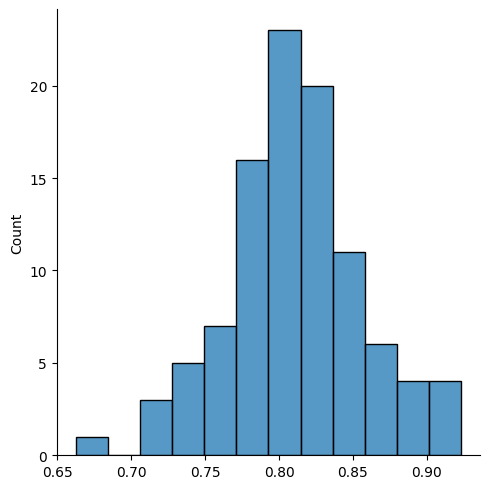

In [4]:
ups_lsm, _ = compute_upsilon(
    df_lsm,
    model_path=model_path,
    n_workers=11,
)
print(np.nanmean(ups_lsm))
sns.displot(ups_lsm)

Loading model from ./modelHRS72p05.gz ...
Computing Upsilon on DataFrame with 100 rows ...


average_fidelity(threads=11): 100%|███████████| 100/100 [00:10<00:00,  9.21it/s]


0.6373407831121558


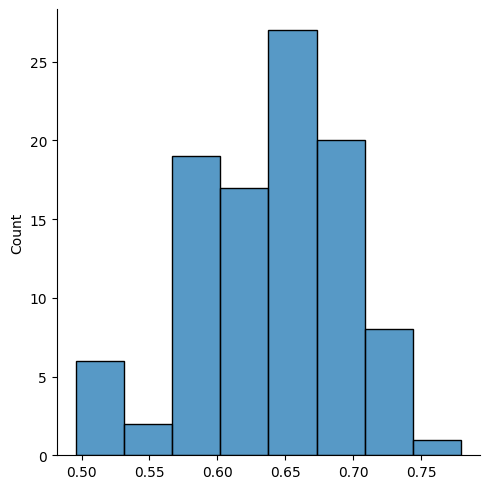

In [17]:
ups_baseline, _ = compute_upsilon(
    df_baseline.round(0).astype(int),
    model_path=model_path,
    n_workers=11,
)
print(np.nanmean(ups_baseline))
sns.displot(ups_baseline)

Loading model from ./modelHRS72p05.gz ...
Computing Upsilon on DataFrame with 100 rows ...


average_fidelity(threads=11): 100%|███████████| 100/100 [00:11<00:00,  9.05it/s]


0.7629033241755798


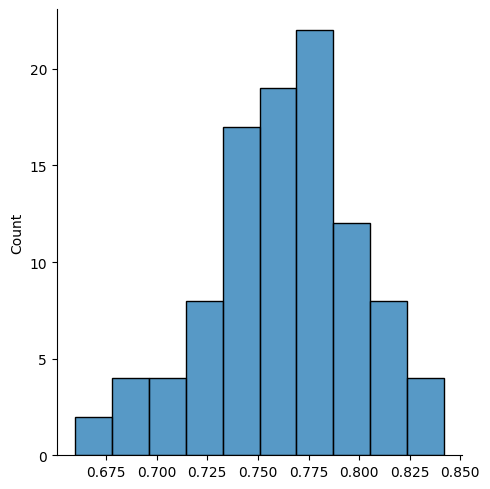

In [20]:
ups_ctgan, _ = compute_upsilon(
    df_ctgan.round(0).astype(int),
    model_path=model_path,
    n_workers=11,
)
print(np.nanmean(ups_ctgan))
sns.displot(ups_ctgan)

<Axes: ylabel='Density'>

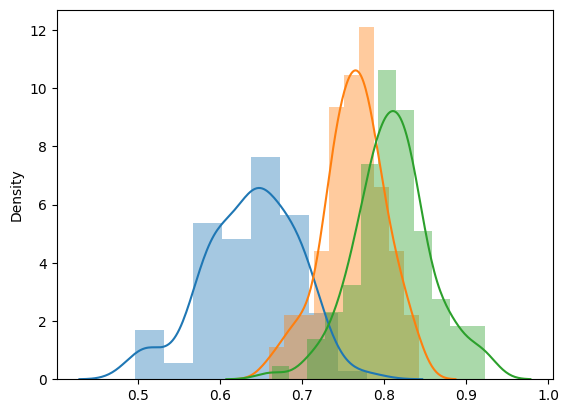

In [21]:
sns.distplot(ups_baseline)
sns.distplot(ups_ctgan)
sns.distplot(ups_lsm)